<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

This project is focused on exploratory data analysis, oft referred to as EDA. EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to pitfalls and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those beyond this class!

---

This homework includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like stackoverflow that have almost certainly done what you are trying to do.

**Get used to using google for finding code!** You will be using it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sb

import matplotlib as mpl
mpl.style.use('ggplot')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put in dictionary format.

The dictionary format for data will be keys as the column names/headers, and values as the row values for that column.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [4]:
# you may need to change this depending on your own directory locations
sat_filepath = '../../DSI-SF-3/datasets/state_sat_scores/sat_scores.csv'

reader = csv.DictReader(open(sat_filepath, 'r'))
sat_dict = {}

for row in reader:
    for column, value in row.items():
        sat_dict.setdefault(column, []).append(value)
        
print sat_dict
    

{'Verbal': ['509', '499', '511', '495', '520', '501', '500', '511', '506', '510', '501', '508', '493', '491', '499', '486', '482', '526', '498', '527', '493', '485', '514', '498', '523', '509', '539', '534', '539', '527', '543', '562', '551', '576', '550', '547', '561', '580', '577', '559', '562', '567', '577', '564', '584', '562', '575', '593', '577', '592', '566', '506'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4'

### 1.2 Make a pandas DataFrame object with the sat dictionary and also with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_df_dict = pd.DataFrame(sat_dict)
sat = pd.read_csv(sat_filepath)

print sat_df_dict.dtypes
print sat.dtypes

Math      object
Rate      object
State     object
Verbal    object
dtype: object
State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame and describe what the data appears to be. 

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [6]:
sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [7]:
sat_dict = {column: [sat[column].dtype] for column in sat.columns}
sat_dict['Math'].append("Average Math Score for the State")
sat_dict['Verbal'].append("Average Verbal Score for the State")
sat_dict['Rate'].append("Percentage of Students who take the SAT")
sat_dict['State'].append("Name of State")
sat_dict['Shape'] = sat.shape
sat_dict

{'Math': [dtype('int64'), 'Average Math Score for the State'],
 'Rate': [dtype('int64'), 'Percentage of Students who take the SAT'],
 'Shape': (52, 4),
 'State': [dtype('O'), 'Name of State'],
 'Verbal': [dtype('int64'), 'Average Verbal Score for the State']}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

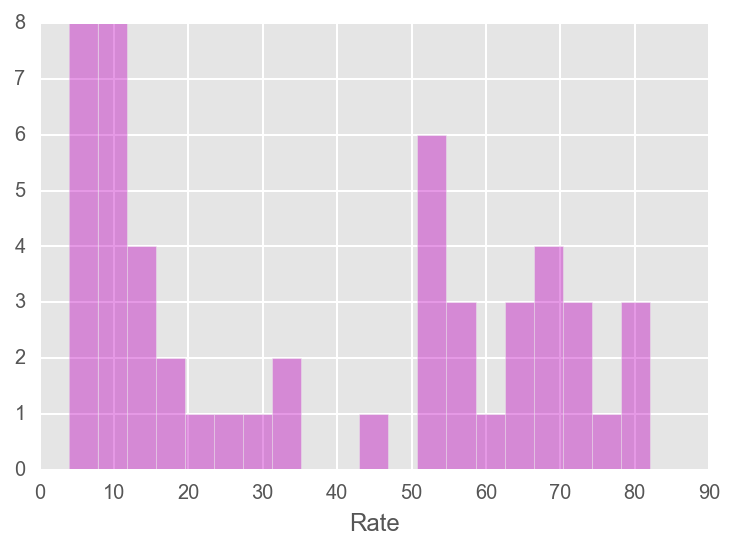

In [8]:
sb.distplot(sat.Rate, kde = False, bins = 20, color = 'm')

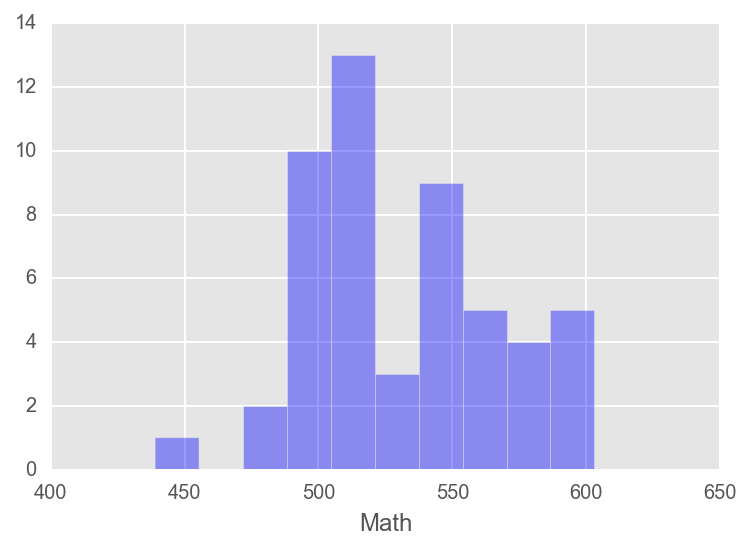

In [9]:
sb.distplot(sat.Math, kde = False, bins = 10, color = 'b')

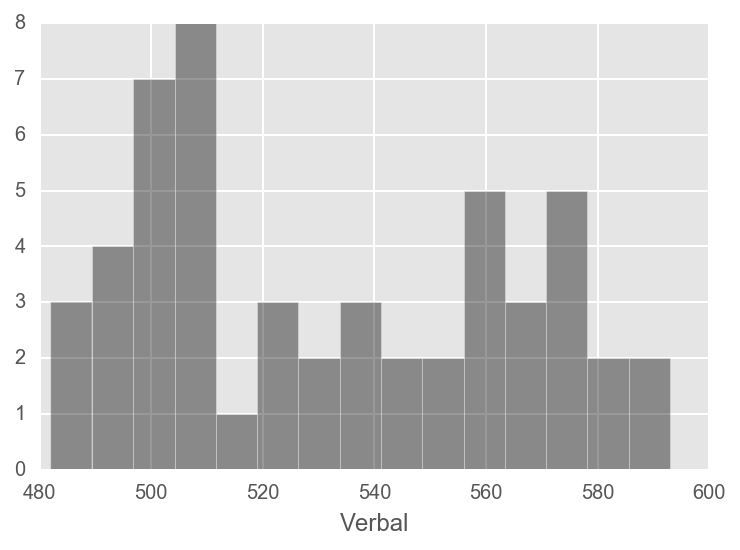

In [10]:
sb.distplot(sat.Verbal, kde = False, bins = 15, color = 'k')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

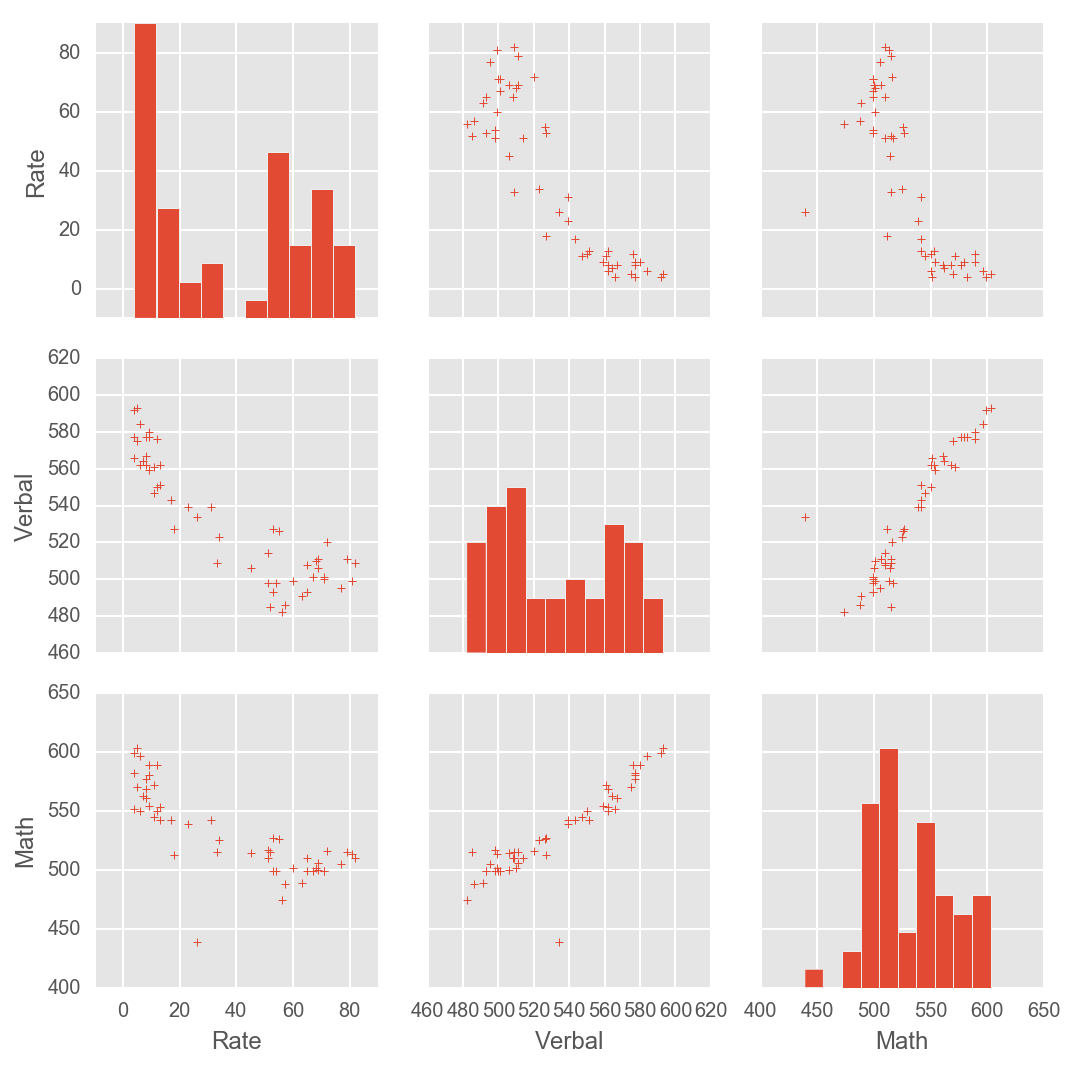

In [11]:
sb.pairplot(data=sat, markers = "+")

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built in plotting functions for your data. Read the documentation here to overview and understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

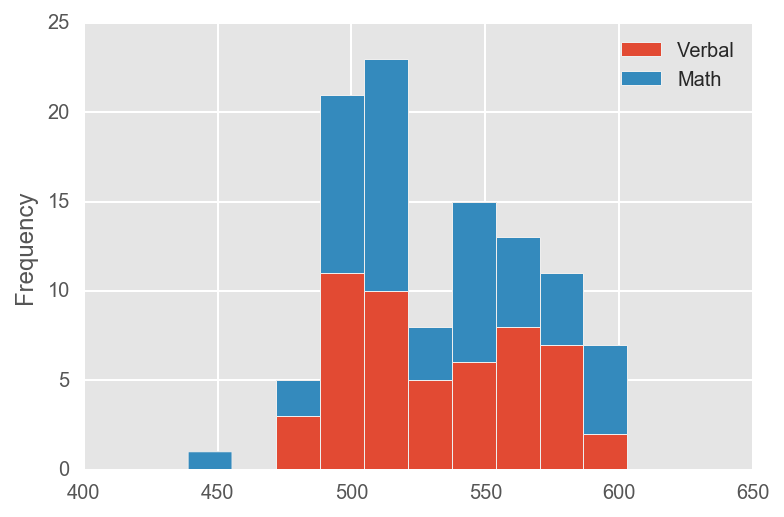

In [12]:
sat_vm = sat.loc[:, ["Verbal", "Math"]]
sat_vm.plot.hist(stacked=True)

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

Answer: You can see the quartiles along with the max and min, which aren't as obvious in other plot types.

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Answer: Rate doesn't use the same scale as Math and Verbal, so the direct comparison wouldn't make a lot of sense.

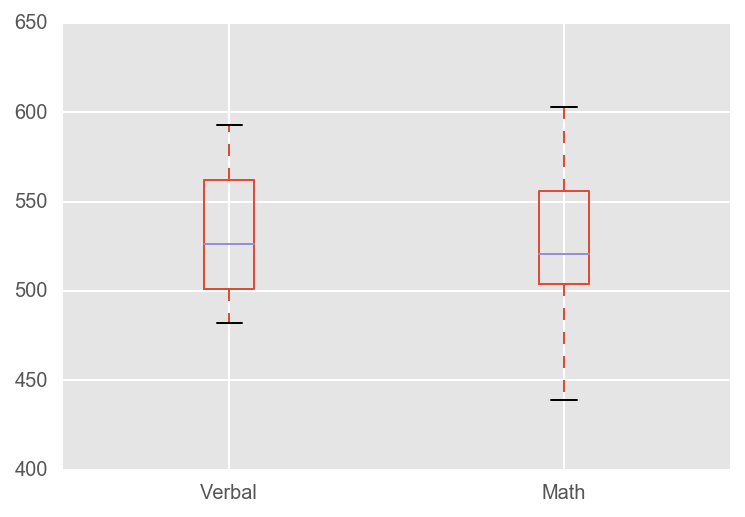

In [13]:
sat_vm.plot.box()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 

Explanation: I chose to normalize all the variables in the dataset so that we could compare the z-statistic for each variable in order to have a valid method of comparison across them. 


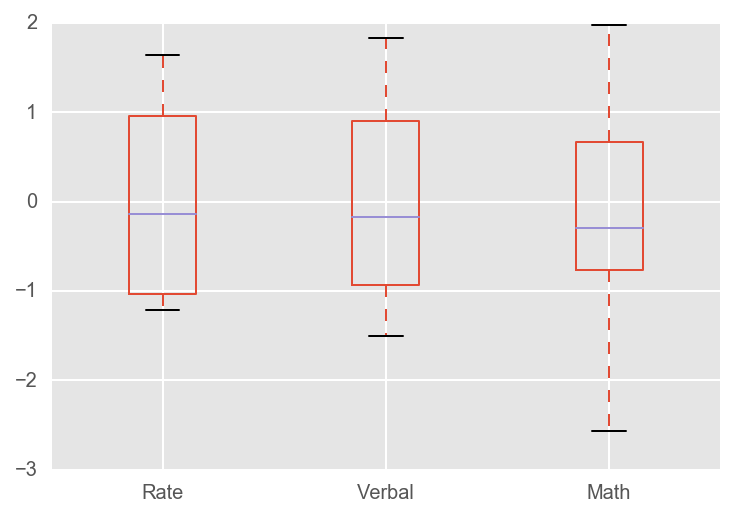

In [14]:
sat_no_state = sat.drop('State', axis=1)
sat_norm = (sat_no_state - sat_no_state.mean())/sat_no_state.std()
sat_norm.plot.box()


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Recall that masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?

Answer: There are 24 states above the mean. This means that the distribution of Verbal scores is positively skewed because the mean is greater than the median (there are 52 states in the dataset in total).


In [15]:
print sat.Verbal.mean()
verb_above_mean = sat[sat.Verbal > sat.Verbal.mean()][["State", "Verbal"]].sort_values(by="Verbal", ascending=False)

print verb_above_mean.count()
print verb_above_mean

532.019230769
State     24
Verbal    24
dtype: int64
   State  Verbal
47    IA     593
49    ND     592
44    WI     584
37    MN     580
48    SD     577
38    KS     577
42    MO     577
33    IL     576
46    UT     575
41    OK     567
50    MS     566
43    LA     564
31    TN     562
45    AR     562
40    NE     562
36    MI     561
39    AL     559
32    NM     551
34    KY     550
35    WY     547
30    ID     543
28    MT     539
26    CO     539
27    OH     534


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

Answer: It includes two more states than the previous list. This is because the median will always split the distribution exactly in half in terms of number of elements on either side. Since the distribution is positively skewed the list of states greater than the mean will be smaller and the list of states greater than the median.

In [16]:
print sat.Verbal.median()
verb_above_median = sat[sat.Verbal > sat.Verbal.median()][["State", "Verbal"]].sort_values(by="Verbal", ascending=False)
print verb_above_median.count()
print verb_above_median

526.5
State     26
Verbal    26
dtype: int64
   State  Verbal
47    IA     593
49    ND     592
44    WI     584
37    MN     580
38    KS     577
48    SD     577
42    MO     577
33    IL     576
46    UT     575
41    OK     567
50    MS     566
43    LA     564
40    NE     562
31    TN     562
45    AR     562
36    MI     561
39    AL     559
32    NM     551
34    KY     550
35    WY     547
30    ID     543
26    CO     539
28    MT     539
27    OH     534
29    WV     527
19    WA     527


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [17]:
sat["Diff"] = sat.Verbal - sat.Math
sat.head()

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [18]:
df1 = sat.sort_values("Diff", ascending = False)[:10]
print df1.head(3)

df2 = sat.sort_values("Diff", ascending = True)[:10]
print df2.head(3)

   State  Rate  Verbal  Math  Diff
27    OH    26     534   439    95
50    MS     4     566   551    15
29    WV    18     527   512    15
   State  Rate  Verbal  Math  Diff
21    HI    52     485   515   -30
23    CA    51     498   517   -19
1     NJ    81     499   513   -14


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?

Answer: It tells us that average Math and Verbal scores in a state are highly correlated with each other and negatively correlated with the Rate.


In [19]:
sat_no_state.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

count: The count of nonempty rows in the specified column

mean: The mean of the specified column

std: The standard deviation of the specified column

min: The minimum of the specified column

25%: The 1st quartile of the specified column

50%: The median of the specified column

75%: The 3rd quartile of the specified column

max: The max of the specified column

In [20]:
sat_no_state.describe()

,Rate,Verbal,Math
count,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000
std,27.301788,33.236225,36.014975
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,504.000000
50%,33.500000,526.500000,521.000000
75%,63.500000,562.000000,555.750000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

Answers:

1. The entries in the covariance matrix are much larger because they signify the covariance between the variables in the dataset as opposed to the correlation

2. The correlation is the normalized version of the covariance, which is produced by dividing the covariance by the standard deviations of each variable

3. The correlation matrix is preferred because since the covariance has been changed to the same scale across all variables, it makes it easier to compare.

In [21]:
sat_covar = sat_no_state.cov()
sat_covar

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets. The drug use dataset has many more variables than the sat dataset. The process for this dataset is more open-ended than the sat dataset.

You should use the techniques you applied above to practice more self-guided EDA here!

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

Answer: It doesn't look like there are any missing values. We could change the variable names, but they already seem fairly intuitive.

In [22]:
# again dataset location might be different on your computer
drug_data_filepath = '../../DSI-SF-3/datasets/drug_use_by_age/drug-use-by-age.csv'
drugs = pd.read_csv(drug_data_filepath)
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

### 7.2 Do a high-level, initial overview of the data

 and take a look at the column variables. Get a feel for what this dataset is all about. The code you use to do this is "up to you", as in you will apply processes you have learned above.

The final response to this question should be a written description of what you deduce and infer the dataset to describe. 

In [47]:
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,Marijuana Use Percentile
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0,5.882353
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,17.647059
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,29.411765
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,41.176471
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,58.823529
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,70.588235
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,94.117647
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,88.235294
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,100.000000
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,82.352941


In [25]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,...,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,...,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,...,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,...,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,...,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,...,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,...,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,...,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.

1. 

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

**EDA Question**

Is Alcohol the most commonly used drugs amongst all age groups?

** EDA Deliverables **

A report of which, if any age groups, have another drug or drugs that are more commonly used than marijuana and what those drugs are.

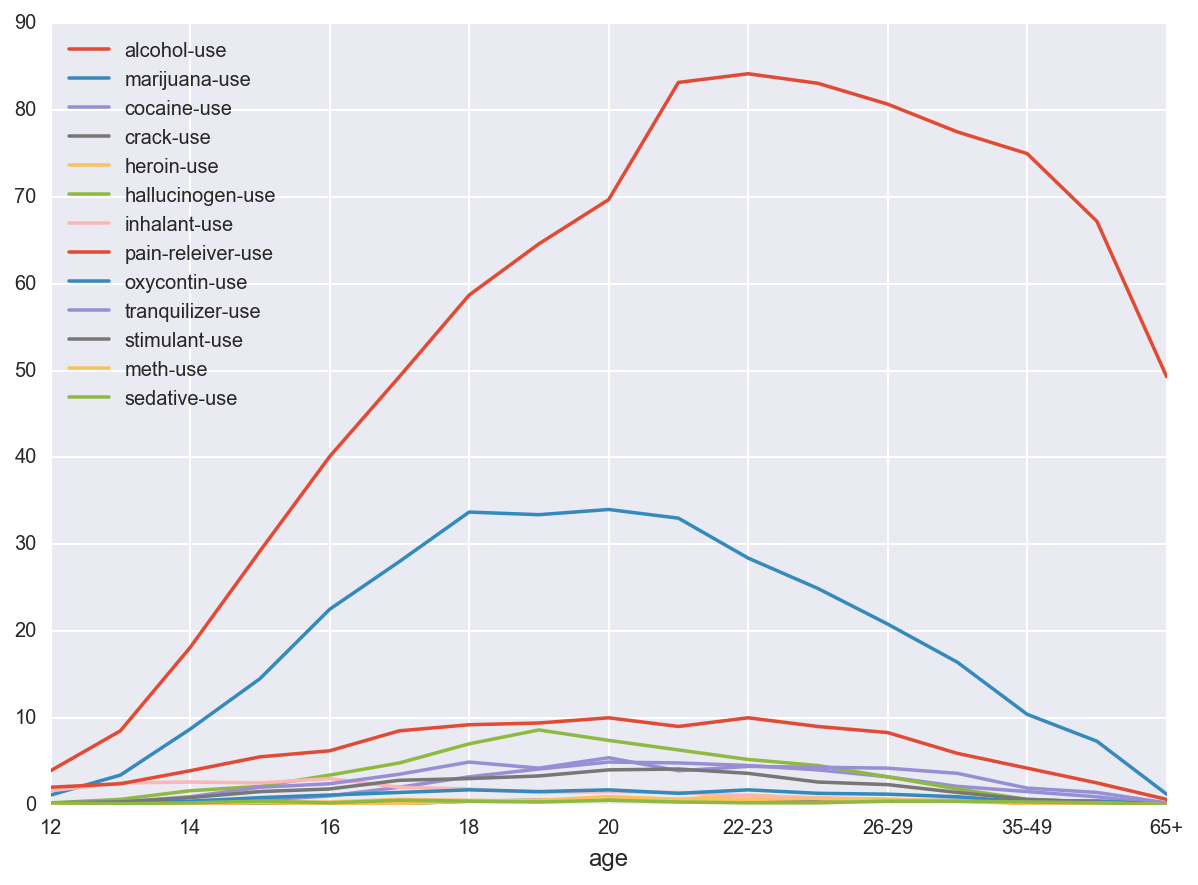

In [77]:
columns = pd.Series(drugs.columns)
use_columns_mask = columns.apply(lambda x: 'use' in x)
use_columns = columns[use_columns_mask | (columns == 'age')]
drug_use  = drugs.loc[:,use_columns]

drug_use.plot(x='age',figsize=(10,7))

From this plot, we can see that alcohol use is higher than all other drugs amongst all age groups.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Covariance and correlation

---

### 9.1 Return to the sat dataset

**Go back to the sat dataset.**

1. Create the covariance matrix for the non-State variables. There are pandas and numpy functions that can do this.
2. What is the difference between the covariance and correlation matrix?
3. Why is the correlation matrix preferred to the covariance matrix for EDA?

2. The entries in the covariance matrix are much larger because they signify the covariance between the variables in the dataset as opposed to the correlation

3. The correlation matrix is preferred because since the covariance has been changed to the same scale across all variables, it makes it easier to compare.


In [27]:
sat.corr()

,Rate,Verbal,Math,Diff
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Diff,-0.101412,0.052600,-0.388219,1.000000


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.2 Deeper into covariance and correlation

1. How is the covariance matrix calculated?
2. How is the correlation matrix calculated?
3. Based on the explicit formulas, what is the primary differences between the two? 


1. The covariance between two variables is the sum of the mean difference vectors of two variables divided by the length of those vectors.

2. The correlation is the covariance divided by the product of the standard deviations of the two variables.

3. The primary difference is that the correlation has been normalized so that it is between -1 and 1 which makes it significantly easier to interpret.


<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9.3 Manual calculation of the covariance and correlation

Create two functions that accept a matrix/DataFrame of numeric columns.

1. Write a function that manually calculates the covariance matrix.
2. Write a function that manually calculates the correlation matrix.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 9. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

A typical measure of outliers are datapoints that are greater than 1.5*IQR above the 3rd quartile or below the 1st quartile

In [39]:
rate = sat['Rate']
print type(rate)
iqr = rate.quantile(.75) - rate.quantile(.25)
upper_limit = rate.quantile(.75) + 1.5 * iqr
lower_limit = rate.quantile(.25) - 1.5 * iqr

rate[(rate > upper_limit) | (rate < lower_limit)]

<class 'pandas.core.series.Series'>


Series([], Name: Rate, dtype: int64)

Since there are no values outside of this range we can conclude that rate has no outliers under this definition.

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 10. Percentile scoring and spearman rank correlation

---

### 10.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


1. The pearson correlation is what we've defined as the 'correlation' up to this point. It is the covariance of two varibales divided by the product of their standard deviations. On the other hand, the spearman rank correlation is the pearson correlation, but of the **ranks** of the two variables instead of the variables themselves. It assess how well the relationship between the two variable can be described using a monotonic function. Generally, the pearson coefficient describes linear relationships between variable, whereas the pearson coefficient describes monotonic relationships.

### 10.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [42]:
rate = sat['Rate']
sat['Percentile Rate'] = rate.apply(lambda x: stats.percentileofscore(rate, x))
sat.head()

,State,Rate,Verbal,Math,Diff,Percentile Rate
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


Percentile is another way to rank values in a vector. The spearman rank correlation uses ordinal ranking instead of percentile ranking, but they both rank values in comparison to the other values in the vector.

### 10.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

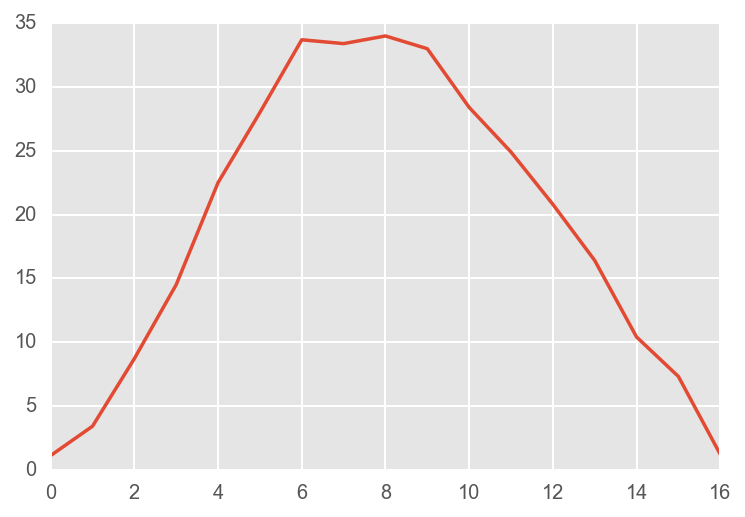

In [45]:
mj = drugs['marijuana-use']
drugs['Marijuana Use Percentile'] = mj.apply(lambda x: stats.percentileofscore(mj, x))
drugs['marijuana-use'].plot(kind = 'line')

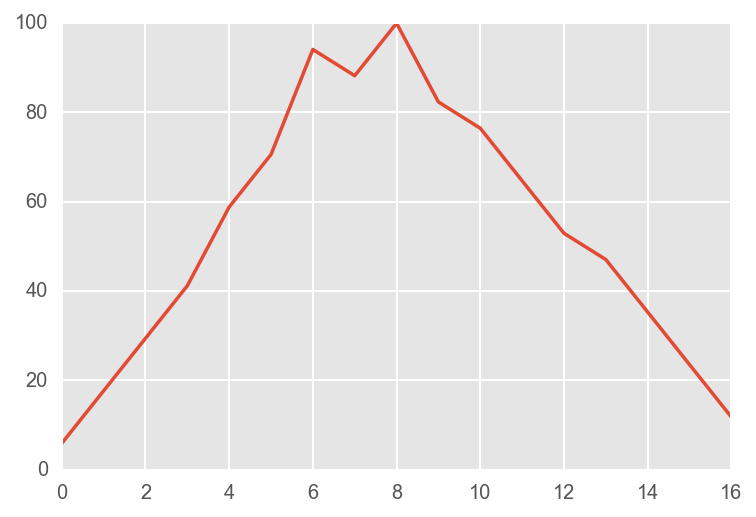

In [46]:
drugs['Marijuana Use Percentile'].plot(kind = 'line')

** Why might percentile scoring be useful for dealing with outliers? **

Percentile scoring might be useful in dealing with outliers because it normalizes the variable to a 0 to 100 scale. No matter how large the outlier, it then won't have a disproportionate amount of influence on the distribution and its statistics.


** Describe the effect, visually, of coverting raw scores to percentile. **

The distributions look pretty similar, but the percentile distribution has been converted to a 0 to 100 scale.